# Training Mask RCNN to instance-segment food images and estimate the calorie content


This notebook was used to train the model, 
If you want to **Train** one can execute from the start 

If you want to **Detect** one can execute from detection & infrence heading after downloading the weights


### Cloning the main application folder from github

In [ ]:
%cd /content/Mask_RCNN/samples
# !rm -R food_mask
!git clone https://github.com/binayakpokhrel/food_mask
% cd food_mask

### Imports and refrences

In [1]:
import random
import os
import sys


ROOT_DIR = os.path.abspath("../../")

sys.path.append(ROOT_DIR)  # To find local version of the library


from food_mask import food
import mrcnn.model as modellib
from mrcnn import utils
from mrcnn import visualize
from mrcnn.model import log

MODEL_DIR = os.path.join(ROOT_DIR, "Thesis_Code\\logs")

c:\users\matte\anaconda3\envs\mask_rcnn\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\matte\anaconda3\envs\mask_rcnn\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\matte\anaconda3\envs\mask_rcnn\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\matte\anaconda3\envs\mask_rcnn\lib\site-packages\ten

## Setting the custom configurations for food images from food.py file
- smaller anchor scales are added in place of bigger anchors as the image objects are relatively smaller
-2 images are trained in one time
-number of classes added
- validation steps changed to 10

In [2]:
config = food.FoodConfig()
FOOD_DIR = os.path.join(ROOT_DIR, "Thesis_Code\\datasets\\MalteseFood_Dataset_Final\\augmented\\Config1")


### Preview of the available dataset
-dataset.prepare() prepares the class_names ,class_ids and refrences to image paths


## For training the model is created in training mode with the above config 

In [4]:
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

# Training 
For Training we used coco trained weights to converge faster on a small scale data 
- The learning rate is set to 0.001
- anchor scales were revised to smaller scales (4,8,16,32,64)
- we train 100 steps per epoch
- and take 10 validation steps every epoch


In [5]:

#COCO_MODEL_PATH='/content/Mask_RCNN/logs/mask_rcnn_coco.h5'
COCO_MODEL_PATH='C:\\Users\\matte\\OneDrive\\Desktop\\Thesis\\Thesis_Code\\logs\\mask_rcnn_coco.h5'

###For training there is an option for choosing the weights of 'coco' trained weights or imagenet or the last trained saved model 

In [6]:
init_with = "coco" 
if init_with == "coco":
    #skipping the layers different due to the class numbers
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights("/content/Mask_RCNN/logs/food20190224T0936/mask_rcnn_food_0003.h5", by_name=True)

### The datasets for train and validation is selected from corresponding folders and prepared with the class_names ,class_ids and refrence to image

In [3]:
dataset_train = food.FoodDataset()
dataset_train.load_food(FOOD_DIR, "train")
dataset_train.prepare()

dataset_val = food.FoodDataset()
dataset_val.load_food(FOOD_DIR,"test")
dataset_val.prepare()

### Finally the model is trained using the above config and 0.001 learning rate , The original paper suggests 0.002 learning  rate but tf freaks out with 0.002 rate maybe because of the differences in implementation of the optimizers.

- after 40 or so epochs the difference of val_loss and train_loss are quite high so we stop training. 


---


- we train for 47 epochs  
- given the small amount of dataset 47 epochs should be enough to converge.


---


- val_loss of  the epoch 44 is 0.3331 and has small difference with the train_loss so we will take this weight to evaluate


In [8]:
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=4,
            layers='all')


Starting at epoch 0. LR=0.001

Checkpoint Path: C:\Users\matte\OneDrive\Desktop\Thesis\Thesis_Code\logs\food20220306T1433\mask_rcnn_food_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b   

c:\users\matte\anaconda3\envs\mask_rcnn\lib\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/4
100/100 [==============================] - 8375s 84s/step - loss: 4.5991 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 2.5884 - mrcnn_class_loss: 0.5045 - mrcnn_bbox_loss: 0.7375 - mrcnn_mask_loss: 0.7359 - val_loss: 3.4599 - val_rpn_class_loss: 0.0076 - val_rpn_bbox_loss: 2.1756 - val_mrcnn_class_loss: 0.1442 - val_mrcnn_bbox_loss: 0.6351 - val_mrcnn_mask_loss: 0.4974

## Detection using inferenceConfig
First we need to load a model weight in inference mode
- Loading Only one Image on the GPU
- 

In [12]:
class InferenceConfig(food.FoodConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

#create the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

model_path='C://Users//matte//OneDrive//Desktop//Thesis//Thesis_Code//logs//Config1//mask_rcnn_food_0004.h5'
#model_path='C://Users//matte//OneDrive//Desktop//Thesis//Thesis_Code//logs//food20211111T1013//mask_rcnn_food_0001.h5'
print(model_path)
print("Loading weights from ", model_path)

model.load_weights(model_path, by_name=True)

C://Users//matte//OneDrive//Desktop//Thesis//Thesis_Code//logs//Config1//mask_rcnn_food_0004.h5
Loading weights from  C://Users//matte//OneDrive//Desktop//Thesis//Thesis_Code//logs//Config1//mask_rcnn_food_0004.h5


Detection using the trained weights. Here we are choosing a random image from validation dataset and giving 

image_id  2 C:\Users\matte\OneDrive\Desktop\Thesis\Thesis_Code\datasets\MalteseFood_Dataset_Final\augmented\Config1\test\IMG_8669.jpg
image                    shape: (3264, 2448, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (3264, 2448, 3)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (3,)                  min:    4.00000  max:    7.00000  int32
bbox                     shape: (3, 4)                min:  528.00000  max: 2296.00000  int32


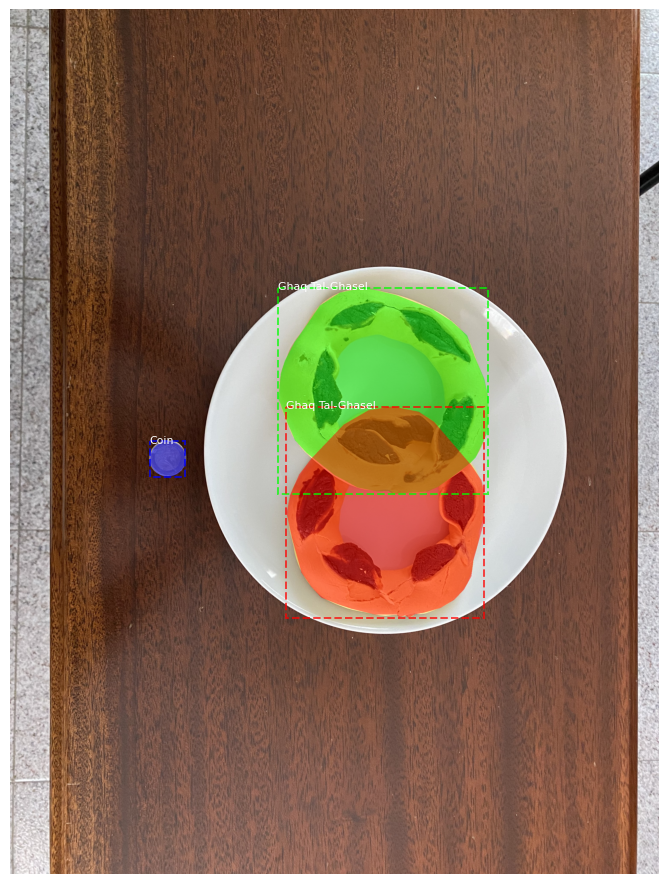

In [14]:
#random.seed(9)

image_id = 2#58#random.choice(dataset_val
           #               .image_ids)

image = dataset_val.load_image(image_id)
mask, class_ids = dataset_val.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_val.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
#("Image Id ",image_id)

# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset_val.class_names)

original_image=image

# Working:
## Coin
- 17441 (Coin pixels)
- Coin in cm2 : d = 2.575cm, r = 1.2875. A= πr² = π·1.2875² ≈ 5.20768cm²
- Proportion of pixels to cm2 : 5.20768cm2 : 17441px ∴ 1cm2 : 3349.092

## Plate
 - 3899745 (Plate Pixels)
 - Average grams of each Zalzett = 460g(Total wieght)/4 (Total number of items) = 115g
 - Plate in CM² : d = 26.5, r = 13.25. A= πr² = π·13.25² ≈ 551.54586cm²
 - Proportion of pixels to cm² : (Plate in CM2) : (Plate in Pixels) = 551.54586cm² : 3899745px ∴  1cm² : 7070.572517759449px

## Template For Each Item
 - (Calories per item avg) = 100g : (x = Kcal for 100g) cal ∴  (x)g(AVG of one food item wight : (y)Kcal (y = Kcal for one item weight)
 - (CM² to pixels ratio) = 1cm² : 7070.572517759449px (Always standard) ∴  (x)cm² : 345756.00px (size of item mask),
 - (Pixel to calorie ratio) = 345756.00px(Pixels for one item) : 240.34Kcal (Work it out from previous values)
 - (Calorie per CM²) = [7070.572517759449px : ?Kcal] ∴ [7070.57251775944px : (x)Kcal] (Work it out from above ratio)
 - CALORIE/CM² = (x)Kcal/cm²

## Zalzett Malti
 - (Calories per item avg) = 100g : 209Kcal ∴  115g(AVG of one zalzett) : 240.35Kcal
 - (CM² to pixels ratio) = 1cm² : 7070.572517759449px ∴  48.90070770528842cm² : 345756.00px,
 - (Pixel to calorie ratio) = 345756.00px(Pixels for one zalzett) : 240.34Kcal
 - (Calorie per CM²) = [7070.572517759449px : ?Kcal] ∴ [7070.57251775944px : 4.914857295081809Kcal]
 - CALORIE/CM² = 4.914857295081809Kcal/cm²

 ## Zalzett Malti 2 (With Coin)
 - (Calories per item avg) = 100g : 209Kcal ∴  115g(AVG of one zalzett) : 240.35Kcal
 - (CM² to pixels ratio) = 1cm² : 3349.092px ∴  35.881457cm² : 120167.00px,
 - (Pixel to calorie ratio) = 120167.00px(Pixels for one zalzett) : 240.34Kcal
 - (Calorie per CM²) = [3349.092px : ?Kcal] ∴ [3349.092px : 6.6983512218829Kcal]
 - CALORIE/CM² = 6.6983512218829Kcal/cm²

## Imqaret
 - (Calories Per Item avg) = 100g : 302Kcal  ∴  35g(AVG imqaret) : 105.7Kcal
 - (CM² to pixels ratio) = 1cm² : 7070.572517759449px(This is the ratio of pixels to cm² from plate)  ∴  39.28776cm² : 277787px (pixels from mask of imqaret)
 - (Pixel to calorie ratio) = 277787px (pixels from mask of imqaret) : 105.7Kcal
 - (Calorie per CM²) = 7070.572517759449px(Pixel equivalent of 1cm²) : ?Kcal , 277787px(Imqaret equivelant in px) : 105.7Kcal  ∴ 7070.572517759449px : 2.6904049330140496kcal
 - IMQARET CALORIE/CM² = 2.6904049330140496Kcal/cm²

 ## Imqaret 2 (With Coin)
 - (Calories Per Item avg) = 100g : 302Kcal  ∴  35g(AVG imqaret) : 105.7Kcal
 - (CM² to pixels ratio) = 1cm² : 3349.092px(This is the ratio of pixels to cm² from coin)  ∴  29.6236cm² : 99212.33 (pixels from mask of imqaret)
 - (Pixel to calorie ratio) = 99212.33px (pixels from mask of imqaret) : 105.7Kcal
 - (Calorie per CM²) = 3349.092(Pixel equivalent of 1cm²) : ?Kcal , 99212.33px(Imqaret equivelant in px) : 105.7Kcal  ∴ 3349.092 : 3.5681kcal
 - IMQARET CALORIE/CM² = 3.5681Kcal/cm²

 ## Gbejniet
 - (Calories Per Item avg) = 100g : 289Kcal  ∴  90g(AVG gbjeniet) : 260.1Kcal
 - (CM² to pixels ratio) = 1cm² : 7070.572517759449px ∴ 31.483730552351496cm² : 222608px
 - (Pixel to calorie ratio) = 222608 :260.1Kcal
 - (Calorie per CM²) = 7070.572517759449px : ?Kcal, 222608px : 260.1Kcal ∴ 7070.572517759449px : 8.261409796005681Kcal
 - GBEJNIET CALORE/CM² = 8.261409796005681Kcal/cm²

 ## Ghaq tal-Ghasel 115
 - (Calories Per Item avg) = 100g : 293Kcal ∴ 115g(AVG Ghaq) : 336.95Kcal
 - (CM² to pixels ratio) = 1cm² : 7070.572517759449px ∴ 94.45727320135546cm² : 667867px
 - (Pixel to calorie ratio) = 667867 : 336.95Kcal
 - (Calorie per CM²) = 7070.572517759449px : ?Kcal, 667867px : 336.95Kcal ∴ 7070.572517759449px : 3.5672213327789013Kcal
 - GHAQ TAL-GHASEL CALORE/CM² = 3.5672213327789013Kcal/cm²

 ## Pastizzi
 - (Calories Per Item avg) = 100g : 278Kcal ∴ 60g(AVG Pastizz) : 166.8Kcal
 - (CM² to pixels ratio) = 1cm² : 7070.572517759449px ∴ 74.90765403645622cm² : 529640px
 - (Pixel to calorie ratio) = 529640px : 166.8Kcal
 - (Calorie per CM²) = 7070.572517759449px : ?Kcal, 529640px : 166.8Kcal ∴ 7070.572517759449px : 2.2267417414890796Kcal
 - PASTIXXI CALORIE/CM² = 2.2267417414890796Kcal

 ## Qassatat
 - (Calories Per Item avg) = 100g : 269Kcal ∴ 264g(AVG Qassatat) : 710.16Kcal
 - (CM² to pixels ratio) = 1cm² : 7070.572517759449px ∴ 92.20073740316866cm² : 651912px
 - (Pixel to calorie ratio) = 651912px : 710.16Kcal
 - (Calorie per CM²) = 7070.572517759449px : ?Kcal, 651912px : 710.16Kcal ∴ 7070.572517759449px : 7.702324514983695Kcal
 - QASSATAT CALORIE/CM² = 7.702324514983695Kcal

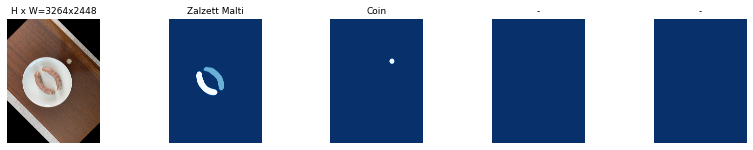

Class : 7
Total Pixels  13842
Class : 5
Total Pixels  240334
Class : 5
Total Pixels  240334


In [9]:
# Printing the Individual masks total pixel sum
import numpy as np
visualize.display_top_masks(image,mask,class_ids,dataset_val.class_names)

for i in class_ids:
    print('Class :',i)
    print('Total Pixels ',mask[:,:,np.where(class_ids == i)[0]].sum())

## Detection Of A single Photo.


11791 Coin
169309 Qassatat
172621 Qassatat


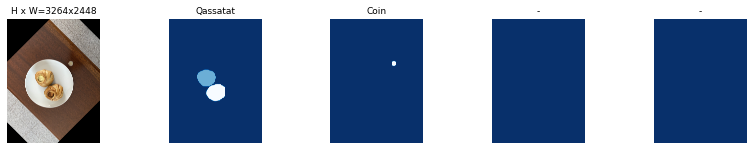

In [16]:
from skimage import io
img_test = io.imread(FOOD_DIR+'\\test\\IMG_8694_225.JPG')
results = model.detect([img_test], verbose=0)
result = results[0]
cls_names = ['BG','Pastizz','Imqaret','Gbejniet','Ghaq Tal-Ghasel','Zalzett Malti','Qassatat','Coin']

for i in range(result['masks'].shape[-1]):
#   print(i)
    masked_food_pixels=result['masks'][:,:,i].sum()
    class_name=cls_names[result['class_ids'][i]]
    print(masked_food_pixels, class_name)
    
visualize.display_top_masks(img_test,result['masks'],result['class_ids'],cls_names)


#visualize.display_instances(original_image, result['rois'], result['masks'], result['class_ids'],
#                             cls_names, result['scores'])

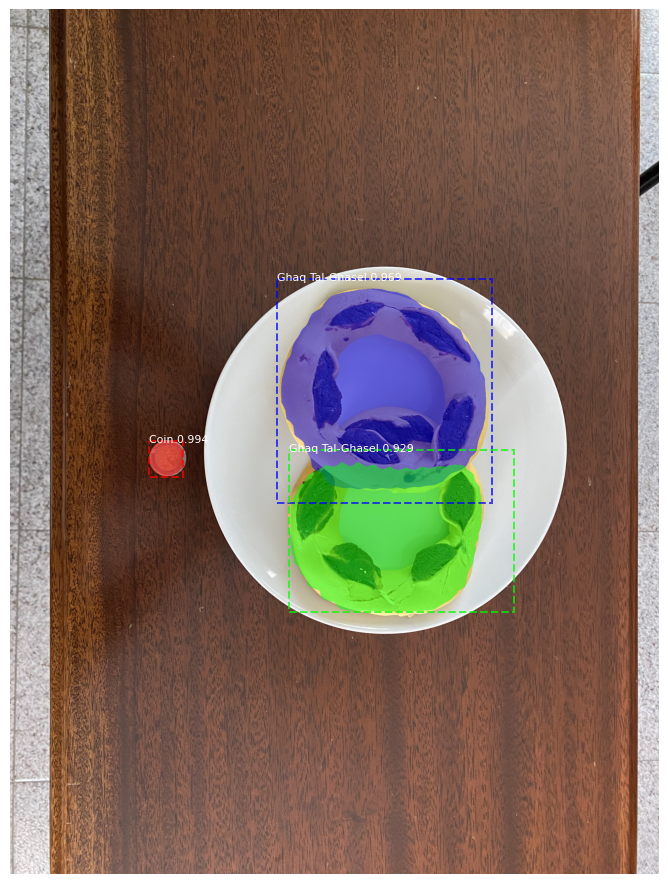

Time Lapsed = 0:0:20.791700839996338
None


In [15]:
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec))

start_time = time.time()
results = model.detect([original_image], verbose=0)


r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'],
                            dataset_val.class_names, r['scores'])

end_time = time.time()
time_lapsed = end_time - start_time
print(time_convert(time_lapsed))


# Approach Calorie estimation
The calorie estimation requires the weight of the food product to be accurate 
---
As we have only the image with us we need to estimate the weight of the food with the provided image
---
Systems with multiple should find it easy to analyse depth of the food presented but pinhole cameras lack the functionality
---
For this purpose we choose refrencing a known object in the image and computing the size of food in image
---
Using known object surface area  we calculate the 'pixel per inches square" value for the given image which gives off the pixel density for an inch square of real life area so that we can compute the real life  surface area hold by  the shown food item
---
# real_food_area = masked_food_pixel_area / pixels_per_inch

In [ ]:

masked_plate_pixels=1130972
real_plate_size=12
real_plate_area=113.04
pixels_per_inch_sq=masked_plate_pixels/real_plate_area
calories=[]
items=[]
for i in range(r['masks'].shape[-1]):
#   print(i)
  masked_food_pixels=r['masks'][:,:,i].sum()
  class_name=dataset_val.class_names[r['class_ids'][i]]
  real_food_area=masked_food_pixels/pixels_per_inch_sq
  calorie=food.get_calorie(class_name,real_food_area)
  calories.append(calorie)
  items.append(class_name)
  print("{1} with {0} calories".format(int(calorie),class_name))

### Plotting the acquired calories

In [ ]:
import matplotlib as plt
 
# Create a pieplot
plt.pie(calories,labels=items)
#plt.show()
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()


# Evaluation of the model
We compute average precision of 40 pictures and print out the average


In [5]:
## This is the step to randomly get a number of images.. detect them and save the actual/predicted - classes/pixels
import numpy as np
random.seed(10)
## Total number of images = 413
image_ids = list(range(0, 413))#dataset_val.image_ids#np.random.choice(dataset_val.image_ids,20)#[150,58,270]
APs = []
IoU = {}
ids = []
gt_masks = {}
gt_class_ids = {}
predicted_masks = {}
predicted_class_ids = {}


for image_id in image_ids:
    # Load image and ground truth data
    #image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    #    modellib.load_image_gt(dataset_val, inference_config,
    #                           image_id, use_mini_mask=False)
    image = dataset_val.load_image(image_id)
    gt_mask, gt_class_id = dataset_val.load_mask(image_id)
    # Compute Bounding box
    gt_bbox = utils.extract_bboxes(gt_mask)

    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])

    predicted_class_ids[image_id] = r['class_ids']
    gt_class_ids[image_id] = gt_class_id
    gt_masks[image_id] = gt_mask
    predicted_masks[image_id] = r['masks']
    IoU[image_id] = overlaps

    APs.append(AP)

#print("mAP: ", np.mean(APs))

In [6]:
## Just method decleration
def save_xls(list_dfs, xls_path):
    with pd.ExcelWriter(xls_path) as writer:
        for n, df in enumerate(list_dfs):
            df.to_excel(writer,'sheet%s' % n)
        writer.save()

In [7]:
###### THIS IS TO GET THE FINAL TABLE OF RESULTS I WOUD LIKE
main_list_pixels = []
main_list_classes = []
main_list_imageid = []
main_list_IoU = []
main_list_actual_imageid = []
main_list_actual_classes = []
main_list_actual_pixels = []


import pandas as pd

##### HERE WE POPULATE THE PREDICTED DICTIONARIES TO BE USED AS A RESULT #####
# Information About variables :
# x : current image_id being looped
# y : just an index for each prediction
for x in predicted_masks:
    for y in range(predicted_masks[x].shape[-1]):
        class_name=dataset_val.class_names[predicted_class_ids[x][y]]
        main_list_pixels.append(predicted_masks[x][:,:,y].sum())
        main_list_classes.append(class_name)
        main_list_imageid.append(x)
        main_list_IoU.append(IoU[x][y].max()*100)

##### HERE WE POPULATE THE GROUND TRUTH DICTIONARIES TO BE USED AS A RESULT #####
for z in gt_masks:
    #print('Image Id: ',z)
    #print('-----------------------')
    for q in range(gt_masks[z].shape[-1]):
        class_name=dataset_val.class_names[gt_class_ids[z][q]]
        #print(class_name,gt_masks[z][:,:,q].sum())
        main_list_actual_classes.append(class_name)
        main_list_actual_pixels.append(gt_masks[z][:,:,q].sum())
        main_list_actual_imageid.append(z)

df = pd.DataFrame(data=main_list_actual_imageid, columns=['Image_id'])
df_2 = pd.DataFrame(data=main_list_imageid, columns=['Image_id'], )


df['Actual Class'] = main_list_actual_classes
df['Actual Pixels'] = main_list_actual_pixels
df_2['Predicted Class'] = main_list_classes
df_2['Predicted Pixels'] = main_list_pixels
df_2['Correct Pixels Predicted (%)'] = main_list_IoU

file_name = 'Thesis_Results.xlsx'

df = df.groupby(['Image_id','Actual Class'])\
    .agg({'Actual Pixels':'sum','Actual Class':'count'})\
    .rename(columns={'Actual Class':'Total Actual Class', 'Actual Pixels':'Total Actual Pixels'})\
    .reset_index()

df_2 = df_2.groupby(['Image_id','Predicted Class'])\
    .agg({'Predicted Pixels':'sum','Predicted Class':'count','Correct Pixels Predicted (%)':'mean'})\
    .rename(columns={'Predicted Class':'Total Predicted Class',
                     'Predicted Pixels':'Total Predicted Pixels',
                     'Correct Pixels Predicted (%)':'Average Pixels Predicted (%)'
                     })\
    .reset_index()

df_final = pd.merge(df,df_2,left_on=['Image_id','Actual Class'],right_on=['Image_id','Predicted Class'],how='outer')
df_final = df_final[['Image_id',
                     'Actual Class',
                     'Predicted Class',
                     'Total Actual Pixels',
                     'Total Predicted Pixels',
                     'Total Actual Class',
                     'Total Predicted Class',
                     'Average Pixels Predicted (%)']]

save_xls([df_final],'Thesis_Results_Grouped.xlsx')

In [24]:
import tensorflow as tf

In [ ]:
activations = model.run_graph([image], [
    ("input_image",        tf.identity(model.keras_model.get_layer("input_image").output)),
    ("res2c_out",          model.keras_model.get_layer("res2c_out").output),
    ("res3c_out",          model.keras_model.get_layer("res3c_out").output),
    ("rpn_bbox",           model.keras_model.get_layer("rpn_bbox").output),
    ("roi",                model.keras_model.get_layer("ROI").output),
])

In [ ]:
import numpy as np
visualize.display_images(np.transpose(activations["res3c_out"][0,:,:,:4], [2, 0, 1]), cols=4)
visualize.display_images(np.transpose(activations["res2c_out"][0,:,:,:4], [2, 0, 1]), cols=4)
